Рассмотрим Optimal Brain Damage для задачи тематического моделирования. Напомним, перед нами ставится задача максимизации: 
$$
L = \sum_{d,w} n_{dw} \log \sum_{t} \phi_{wt} \theta_{td}
$$
У нас есть какое-то решение $\phi$  и $\theta$, мы хотим его сделать более разреженным, сохранив структуру и несильно испортив правдоподобие, используя метод OBD. 

Далее будем использовать стандартные обозначения ARTM ($p_{tdw}$, $n_{wt}$, $n_t$ и так далее).

### Математическая составляющая
####Зануление \Phi
 Для каждого $w$, $t$ определелим изменение правдоподобия при занулении $\phi_{wt}$:
$$
\Delta_1 L = \sum_{d} n_{dw} \left( \log \sum_{s\colon s\neq t} \phi_{ws} \theta_{sd} - \log \sum_{s} \phi_{ws} \theta_{sd} \right)=
\sum_{d} n_{dw} \log \frac{\sum_{s\colon s\neq t} \phi_{ws} \theta_{sd} }{\sum_{s} \phi_{ws} \theta_{sd}}=
$$
$$
=
\sum_{d} n_{dw} \log \left( 1 - \frac{\phi_{wt} \theta_{td} }{\sum_{s} \phi_{ws} \theta_{sd}} \right) =
\sum_{d} n_{dw} \log(1 - p_{tdw}) \approx - \sum_{d} n_{dw} p_{tdw} = - n_{wt}
$$
Таким образом, если мы хотим занулять параметры модели для разреживания, кажется, что нужно занулять параметры с наименьшим значением $n_{wt}$. Однако, здесь опускается один важный момент: когда мы разреживаем модель и зануляем какой-то $\phi_{wt}$, вероятность всех остальных слов в теме увеличивается, а это увеличивает правдоподобие. Оценим эффект увеличения логарифма правдоподобия при занулении $\phi_{wt}$:
$$
\Delta_2 L = \sum_{d, u \neq w} n_{du} \left( \log \left( \sum_{s \neq t} \phi_{us} \theta_{sd}  + \frac{\phi_{us}}{1 - \phi_{wt}} \theta_{td} \right) - \log \sum_{s} \phi_{us} \theta_{sd} \right)=
$$
$$
=\sum_{d, u \neq w} n_{du} \left( \log \left( \sum_{s} \phi_{us} \theta_{sd}  + \frac{\phi_{wt}}{1 - \phi_{wt}} \phi_{us} \theta_{td} \right) - \log \sum_{s} \phi_{us} \theta_{sd} \right)=
$$
$$
=\sum_{d, u \neq w} n_{du} \log \left(1 + \frac{\phi_{wt}}{1 - \phi_{wt}} \frac{\phi_{us} \theta_{td} }{\sum_{s} \phi_{us} \theta_{sd}}\right) = \sum_{d, u \neq w} n_{du}  \log \left(1 + \frac{\phi_{wt}}{1 - \phi_{wt}} p_{tdu}\right) \approx
$$
$$
\approx \sum_{d, u \neq w} n_{du} \frac{\phi_{wt}}{1 - \phi_{wt}} p_{tdu} = \frac{\phi_{wt}}{1 - \phi_{wt}} \sum_{d, u \neq w} n_{du} p_{tdu} = \frac{\phi_{wt}}{1 - \phi_{wt}} \left( n_t - n_{wt}\right) = 
$$
$$
=\frac{\phi_{wt} n_t}{1 - \phi_{wt}} \left( 1 - \frac{n_{wt}}{n_t}\right) \approx n_{wt}
$$
В первом приближении за счёт увеличения $\phi_{ut}$ при $u \neq w$ логарифм правдоподобия увеличится на $n_{wt}$. То есть суммарно в первом приближении правдоподобие не изменится. У данной проблемы есть два решения. Во-первых, мы можем честно посчитать $\Delta_1 L $ и $\Delta_2 L $ на Е-шаге и использовать их сумму (их можно эффективно быстро подсчитать, однако есть минус, что есть логарифмы, а это сказывается на скорости выполнения). Второй способ - разложить изменение не до первого члена в ряде тейлора, а до второго.
$$
\Delta_1 L = \sum_{d} n_{dw} \log(1 - p_{tdw}) \approx = - \sum_{d} n_{dw} \left( p_{tdw} + \frac12 p_{tdw}^2\right) = -n_{wt} -  \frac12 \sum_{d} n_{dw} p_{tdw}^2
$$
$$
\Delta_2 L = \sum_{d, u \neq w} n_{du}  \log \left(1 + \frac{\phi_{wt}}{1 - \phi_{wt}} p_{tdu}\right) \approx
\sum_{d, u \neq w} n_{du}  \left(\frac{\phi_{wt}}{1 - \phi_{wt}} p_{tdu} - \frac12\left( \frac{\phi_{wt}}{1 - \phi_{wt}}  \right)^2 p_{tdu}^2\right) =
$$
$$
= \frac{\phi_{wt}}{1 - \phi_{wt}}  \left( n_t - n_{wt}\right) - \frac12\left( \frac{\phi_{wt}}{1 - \phi_{wt}}  \right)^2 \sum_{d, u \neq w} n_{du} p_{tdu}^2 \approx n_{wt} - \frac12\left( \frac{\phi_{wt}}{1 - \phi_{wt}}  \right)^2 \sum_{d, u \neq w} n_{du} p_{tdu}^2
$$
Итак,
$$
\Delta L = \Delta_1 L + \Delta_2 L \approx -  \frac12 \sum_{d} n_{dw} p_{tdw}^2 - \frac12\left( \frac{\phi_{wt}}{1 - \phi_{wt}}  \right)^2 \sum_{d, u \neq w} n_{du} p_{tdu}^2
$$
Это тоже можно эффективно подсчитать на E шаге, только теперь не будет логарифмов, а значит считаться будет быстрее.
####Зануление $\Theta$
Аналогично доказывается, что
$$
\Delta L = \sum_w n_{dw} \log \left( 1 - p_{tdw}\right) - n_d \log(1 - \theta_{td})
$$
###Как это можно использовать
1. Для разреживания модели на Е шаге. Можно разреживать уже имеющееся хорошее решение, можно делать по ходу итераций.
2. Когда мы хотим выбирать характерные слова из темы, можно выбирать не по $\phi_{wt}$, а по $\Delta_1 L + \Delta_2 L$.

#Питоновская реализация EM алгоритма

Полезно проделать, чтобы разобраться в numpy и в том, как эффективно писать на питоне.

In [1]:
import numpy as np
import scipy
import scipy.sparse
from sklearn.datasets import fetch_20newsgroups
import gensim
from collections import Counter
import heapq
import nltk
from nltk.corpus import stopwords
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline

Нужно скачать некоторые коллекции данных и установить библиотеки (nltk, gensim)

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/tylorn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
english_stopwords = set(stopwords.words('english'))

## Исходники, можно пропускать

In [4]:
def trivial_p_dwt_processor(p_dwt):
    pass

def create_frac_of_max_p_dwt_processor(frac_size):
    def fun(p_dwt):
        maximums = np.max(p_dwt, axis=1)
        p_dwt[p_dwt < frac_size * maximums[:, np.newaxis]] = 0.
        p_dwt /= (np.sum(p_dwt, axis=1)[:, np.newaxis] + 1e-10)
    return fun

In [5]:
def perform_e_step_update(freq_matrix, docptr, phi_matrix, theta_matrix, params):
    block_size = params.get('block_size', 1)
    p_dwt_processor = params.get('p_dwt_processor', lambda x: None)
    
    D, W = freq_matrix.shape
    T = phi_matrix.shape[0]
    n_wt, n_dt = np.zeros((W, T)), np.zeros((D, T))
    transposed_phi_matrix = np.transpose(phi_matrix)
    
    indices = freq_matrix.indices
    indptr = freq_matrix.indptr
    data = freq_matrix.data
    
    for block_num in xrange((D + block_size - 1) / block_size):
        block_start = block_num * block_size
        block_finish = min(D, block_start + block_size)
        ind_start, ind_finish = indptr[block_start], indptr[block_finish]
        
        datas = data[ind_start:ind_finish]
        words = indices[ind_start:ind_finish]
        docs = docptr[ind_start:ind_finish]
        
        p_dwt = transposed_phi_matrix[words] * theta_matrix[docs, :]
        p_dwt /= (np.sum(p_dwt, axis=1)[:, np.newaxis] + 1e-10)
        p_dwt_processor(p_dwt)
        p_dwt *= datas[:, np.newaxis]
        
        for doc_num in xrange(block_start, block_finish):
            doc_start, doc_finish = indptr[doc_num], indptr[doc_num + 1]
            doc_p_dwt = p_dwt[(doc_start - ind_start):(doc_finish - ind_start), :]
            n_dt[doc_num, :] += np.sum(doc_p_dwt, axis=0)
            n_wt[indices[doc_start:doc_finish], :] += doc_p_dwt

    return n_wt, n_dt

In [6]:
def perform_obg_e_step_update(freq_matrix, docptr, phi_matrix, theta_matrix, params):
    block_size = params.get('block_size', 1)
    percentile = params.get('percentile', 99)
    return_gamma = params.get('return_gamma', False)
    theta_obg = params.get('theta_obg', False)
    
    D, W = freq_matrix.shape
    T = phi_matrix.shape[0]
    n_wt, n_dt = np.zeros((W, T)), np.zeros((D, T))
    alpha_wt, beta_wt = np.zeros((W, T)), np.zeros((W, T))
    if theta_obg:
        alpha_dt = np.zeros((D, T))
    transposed_phi_matrix = np.transpose(phi_matrix)
    
    indices = freq_matrix.indices
    indptr = freq_matrix.indptr
    data = freq_matrix.data
    
    for block_num in xrange((D + block_size - 1) / block_size):
        block_start = block_num * block_size
        block_finish = min(D, block_start + block_size)
        ind_start, ind_finish = indptr[block_start], indptr[block_finish]
        
        datas = data[ind_start:ind_finish]
        words = indices[ind_start:ind_finish]
        docs = docptr[ind_start:ind_finish]
        
        p_dwt = transposed_phi_matrix[words] * theta_matrix[docs, :]
        p_dwt /= (np.sum(p_dwt, axis=1)[:, np.newaxis] + 1e-20)
        
        alpha_dwt = np.log(1. - p_dwt) * datas[:, np.newaxis]
        beta_dwt = np.log(1. + p_dwt) * datas[:, np.newaxis]
        n_dwt = p_dwt * datas[:, np.newaxis]
        
        for doc_num in xrange(block_start, block_finish):
            doc_start, doc_finish = indptr[doc_num], indptr[doc_num + 1]
            
            doc_n_dwt = n_dwt[(doc_start - ind_start):(doc_finish - ind_start), :]
            doc_alpha_dwt = alpha_dwt[(doc_start - ind_start):(doc_finish - ind_start), :]
            doc_beta_dwt = beta_dwt[(doc_start - ind_start):(doc_finish - ind_start), :]
            
            n_dt[doc_num, :] += np.sum(doc_n_dwt, axis=0)
            
            if theta_obg:
                alpha_dt[doc_num, :] += np.sum(doc_alpha_dwt, axis=0)
                
            positions = indices[doc_start:doc_finish]
            n_wt[positions, :] += doc_n_dwt
            alpha_wt[positions, :] += doc_alpha_dwt
            beta_wt[positions, :] += doc_beta_dwt
    
    beta_t = np.sum(beta_wt, axis=0)
    gamma_wt = alpha_wt + transposed_phi_matrix * (1. - transposed_phi_matrix) * (beta_t[np.newaxis, :] - beta_wt)
    bound = np.percentile(gamma_wt[gamma_wt < 0], percentile)
    n_wt[gamma_wt > bound] = 0.
    
    if theta_obg:
        gamma_dt = alpha_dt + np.sum(n_dt, axis=1)[:, np.newaxis] * np.log(1. - theta_matrix)
        bound = np.percentile(gamma_dt[gamma_dt < 0], percentile)
        n_dt[gamma_dt > bound] = 0.
    
    plt.hist(np.log(- gamma_wt[(gamma_wt < 0) & (gamma_wt > -100)]).flatten(), bins=100)
    plt.show()
    
    if return_gamma:
        return n_wt, n_dt, gamma_wt
    else:
        return n_wt, n_dt

In [7]:
def launch_em(
    freq_matrix, 
    phi_matrix,
    theta_matrix,
    logger,
    regularizations_list,
    params_list,
    iters_count=100
):
    phi_matrix = np.array(phi_matrix)
    theta_matrix = np.array(theta_matrix)
    docptr = []
    indptr = freq_matrix.indptr
    for doc_num in xrange(D):
        docptr.extend([doc_num] * (indptr[doc_num + 1] - indptr[doc_num]))
    docptr = np.array(docptr)
    
    for it in xrange(iters_count):
        print it
        n_wt, n_dt = params_list[it]['method'](freq_matrix, docptr, phi_matrix, theta_matrix, params_list[it])
        r_wt, r_dt = regularizations_list[it](n_wt, n_dt, phi_matrix, theta_matrix)
        n_wt = np.maximum(n_wt + r_wt, 0)
        n_dt = np.maximum(n_dt + r_dt, 0)
        n_wt /= np.sum(n_wt, axis=0)
        n_dt /= np.sum(n_dt, axis=1)[:, np.newaxis]
        phi_matrix = np.transpose(n_wt)
        theta_matrix = n_dt
        logger(freq_matrix, docptr, phi_matrix, theta_matrix)
        
    return phi_matrix, theta_matrix

In [8]:
def trivial_regularization(n_wt, n_dt, phi_matrix, theta_matrix):
    return 0., 0.

def calculate_decorr(phi_matrix):
    aggr_phi = np.sum(phi_matrix, axis=1)
    return np.sum(phi_matrix * (aggr_phi[:, np.newaxis] - phi_matrix))

def create_reg_decorr_naive(tau, theta_alpha=0.):
    def fun (n_wt, n_dt, phi_matrix, theta_matrix):
        aggr_phi = np.sum(phi_matrix, axis=1)
        return - tau * np.transpose(phi_matrix * (aggr_phi[:, np.newaxis] - phi_matrix)), theta_alpha
    return fun

def create_reg_lda(phi_alpha, theta_alpha):
    def fun (n_wt, n_dt, phi_matrix, theta_matrix):
        return phi_alpha, theta_alpha
    return fun

def create_reg_decorr_unbiased(tau, theta_alpha=0.):
    def fun (n_wt, n_dt, phi_matrix, theta_matrix):
        tmp_phi =  n_wt / np.sum(n_wt, axis=0)
        aggr_phi = np.sum(tmp_phi, axis=0)
        return - tau * tmp_phi * (aggr_phi[np.newaxis, :] - tmp_phi), theta_alpha
    return fun

def calculate_likelihood(freq_matrix, docptr, phi_matrix, theta_matrix, block_size=1):
    D, W = freq_matrix.shape
    T = phi_matrix.shape[0]
    transposed_phi_matrix = np.transpose(phi_matrix)
    
    indices = freq_matrix.indices
    indptr = freq_matrix.indptr
    data = freq_matrix.data
    
    res = 0.
    for block_num in xrange((D + block_size - 1) / block_size):
        block_start = block_num * block_size
        block_finish = min(D, block_start + block_size)
        ind_start, ind_finish = indptr[block_start], indptr[block_finish]
        
        datas = data[ind_start:ind_finish]
        words = indices[ind_start:ind_finish]
        docs = docptr[ind_start:ind_finish]
        
        p_dwt = transposed_phi_matrix[words] * theta_matrix[docs, :]
        res += np.sum(np.log(np.sum(p_dwt, axis=1) + 1e-10) * datas)
    
    return res


def create_decorr_logger(tau):
    def fun(freq_matrix, docptr, phi_matrix, theta_matrix):
        likelihood = calculate_likelihood(freq_matrix, docptr, phi_matrix, theta_matrix, 50)
        decorr = calculate_decorr(phi_matrix)
        print 'L', likelihood
        print 'decorr', decorr
        print 'L + tau R', likelihood - tau * decorr
        non_zeros = np.sum(phi_matrix > 1e-20)
        size = phi_matrix.shape[0] * phi_matrix.shape[1]
        print 'Non zeros elements', non_zeros, '   fraction', round(1. * non_zeros / size, 2)
    return fun

In [27]:
def prepare_dataset(dataset):
    # remove stopwords
    occurences = Counter()
    for i, doc in enumerate(dataset.data):
        tokens = gensim.utils.lemmatize(doc)
        for token in set(tokens):
            occurences[token] += 1
        if i % 500 == 0:
            print 'Processed: ', i, 'documents from', len(dataset.data)
    
    row, col, data = [], [], []
    token_2_num = {}
    for i, doc in enumerate(dataset.data):
        tokens = gensim.utils.lemmatize(doc)
        cnt = Counter()
        for token in tokens:
            word = token.split('/')[0]
            if word not in english_stopwords and 10 <= occurences[token] < len(dataset.data) / 2:
                if token not in token_2_num:
                    token_2_num[token] = len(token_2_num)
                cnt[token_2_num[token]] += 1
        for w, c in cnt.iteritems():
            row.append(i)
            col.append(w)
            data.append(c)
        
    num_2_token = {
        v: k
        for k, v in token_2_num.iteritems()
    }
    print 'Nonzero values:', len(data)
    return scipy.sparse.csr_matrix((data, (row, col))), token_2_num, num_2_token


### Используем коллекцию 20newsgroups

Возьмём три научные темы, очистим данные, лемматизируем слова, удаляем редкие и частые слова (реализация этого в клетке выше).

In [28]:
dataset = fetch_20newsgroups(
    subset='train',
    remove=('headers', 'footers', 'quotes')
)

In [29]:
%%time
origin_freq_matrix, token_2_num, num_2_token = prepare_dataset(dataset)

Processed:  0 documents from 11314
Processed:  500 documents from 11314
Processed:  1000 documents from 11314
Processed:  1500 documents from 11314
Processed:  2000 documents from 11314
Processed:  2500 documents from 11314
Processed:  3000 documents from 11314
Processed:  3500 documents from 11314
Processed:  4000 documents from 11314
Processed:  4500 documents from 11314
Processed:  5000 documents from 11314
Processed:  5500 documents from 11314
Processed:  6000 documents from 11314
Processed:  6500 documents from 11314
Processed:  7000 documents from 11314
Processed:  7500 documents from 11314
Processed:  8000 documents from 11314
Processed:  8500 documents from 11314
Processed:  9000 documents from 11314
Processed:  9500 documents from 11314
Processed:  10000 documents from 11314
Processed:  10500 documents from 11314
Processed:  11000 documents from 11314
Nonzero values: 576936
CPU times: user 10min 9s, sys: 28 ms, total: 10min 9s
Wall time: 10min 9s


##Оценка качества модели

Считаем следующие метрики: правдоподобие, разреженность(доля и количество ненулевых элементов в матрицах), коррелированность тем, оценка качества SVM, обученного предсказывать метку документа по полученным признакам документов.

In [30]:
def evaluate(freq_matrix, phi, theta, dataset):
    T, W = phi.shape
    D, T = theta.shape
    
    docptr = []
    indptr = freq_matrix.indptr
    for doc_num in xrange(D):
        docptr.extend([doc_num] * (indptr[doc_num + 1] - indptr[doc_num]))
    docptr = np.array(docptr)
    
    correlation_on_topic = calculate_decorr(phi) / (T * (T - 1))
    log_likelihood = calculate_likelihood(origin_freq_matrix, docptr, phi, theta, 50)
    phi_non_zeros = np.sum(phi > 1e-20)
    phi_size = W * T
    theta_non_zeros = np.sum(theta > 1e-20)
    theta_size = D * T

    theta_copy = theta.copy()
    theta_copy[np.isnan(theta_copy)] = 1. / T
    svm_score = np.mean(cross_val_score(SVC(), theta_copy, dataset.target, 'accuracy', cv=4))

    print 'L\t\t\t\t', round(log_likelihood)
    print 'Average topic correlation\t', round(correlation_on_topic, 4)
    print 'Phi nonzeros\t\t\t', phi_non_zeros, '\tfrac\t', 1. * phi_non_zeros / phi_size
    print 'Theta nonzeros\t\t\t', theta_non_zeros, '\tfrac\t', 1. * theta_non_zeros / theta_size
    print 'SVM score\t\t\t', round(svm_score, 4)

## baseline решение - обычный PLSA

In [31]:
# design experiment

D, W = origin_freq_matrix.shape
T = 25

np.random.seed(42)

phi_matrix = np.random.uniform(size=(T, W)).astype(np.float64)
phi_matrix /= np.sum(phi_matrix, axis=1)[:, np.newaxis]

theta_matrix = np.random.uniform(size=(D, T)).astype(np.float64)
theta_matrix /= np.sum(theta_matrix, axis=1)[:, np.newaxis]

no_selection_params = {
    'method': perform_e_step_update,
    'block_size': 50,
    'p_dwt_processor': trivial_p_dwt_processor
}

regularizations_list = np.zeros(50, dtype=object)
params_list = np.zeros(50, dtype=object)

regularizations_list[:] = trivial_regularization
params_list[:] = no_selection_params

phi, theta = launch_em(
    freq_matrix=origin_freq_matrix, 
    phi_matrix=phi_matrix,
    theta_matrix=theta_matrix,
    logger=create_decorr_logger(0.),
    regularizations_list=regularizations_list,
    params_list=params_list,
    iters_count=50
)

0
L -7577557.14498
decorr 24.8513606695
L + tau R -7577557.14498
Non zeros elements 222025    fraction 1.0
1
L -7544645.12672
decorr 24.8185559002
L + tau R -7544645.12672
Non zeros elements 222025    fraction 1.0
2
L -7490147.65267
decorr 24.7372627276
L + tau R -7490147.65267
Non zeros elements 222025    fraction 1.0
3
L -7409587.12834
decorr 24.5705428905
L + tau R -7409587.12834
Non zeros elements 222025    fraction 1.0
4
L -7314078.58123
decorr 24.3309707495
L + tau R -7314078.58123
Non zeros elements 222025    fraction 1.0
5
L -7220166.49586
decorr 24.1372623993
L + tau R -7220166.49586
Non zeros elements 222025    fraction 1.0
6
L -7139209.80822
decorr 24.098580852
L + tau R -7139209.80822
Non zeros elements 221994    fraction 1.0
7
L -7064706.38328
decorr 24.1187026094
L + tau R -7064706.38328
Non zeros elements 221910    fraction 1.0
8
L -6993093.44012
decorr 24.1580141136
L + tau R -6993093.44012
Non zeros elements 221679    fraction 1.0
9
L -6928340.54047
decorr 24.224251684

In [32]:
evaluate(origin_freq_matrix, phi, theta, dataset)

L				-6553963.0
Average topic correlation	0.0404
Phi nonzeros			105208 	frac	0.473856547686
Theta nonzeros			189182 	frac	0.668842142478
SVM score			0.4668


За 50 итераций алгоритм не успевает сойтись так, чтобы занулить большую часть параметров. Если сделать 100 итераций то будет гораздо лучшее решение.

## Регуляризатор разреживания из ARTM

In [33]:
# design experiment

D, W = origin_freq_matrix.shape
T = 25

np.random.seed(42)

phi_matrix = np.random.uniform(size=(T, W)).astype(np.float64)
phi_matrix /= np.sum(phi_matrix, axis=1)[:, np.newaxis]

theta_matrix = np.random.uniform(size=(D, T)).astype(np.float64)
theta_matrix /= np.sum(theta_matrix, axis=1)[:, np.newaxis]

no_selection_params = {
    'method': perform_e_step_update,
    'block_size': 50,
    'p_dwt_processor': trivial_p_dwt_processor
}

regularizations_list = np.zeros(50, dtype=object)
params_list = np.zeros(50, dtype=object)

regularizations_list[:] = create_reg_lda(-0.001, -0.001)
params_list[:] = no_selection_params

phi, theta = launch_em(
    freq_matrix=origin_freq_matrix, 
    phi_matrix=phi_matrix,
    theta_matrix=theta_matrix,
    logger=create_decorr_logger(0.),
    regularizations_list=regularizations_list,
    params_list=params_list,
    iters_count=50
)

0
L -7577547.3885
decorr 24.8512951894
L + tau R -7577547.3885
Non zeros elements 221919    fraction 1.0
1
L -7544610.51603
decorr 24.8184738235
L + tau R -7544610.51603
Non zeros elements 221828    fraction 1.0
2
L -7490069.49806
decorr 24.7371319459
L + tau R -7490069.49806
Non zeros elements 221715    fraction 1.0
3
L -7409444.35781
decorr 24.5702850465
L + tau R -7409444.35781
Non zeros elements 221523    fraction 1.0
4
L -7313865.19414
decorr 24.3304800711
L + tau R -7313865.19414
Non zeros elements 221022    fraction 1.0
5
L -7219904.80033
decorr 24.1365578558
L + tau R -7219904.80033
Non zeros elements 219594    fraction 0.99
6
L -7138936.54551
decorr 24.0977609773
L + tau R -7138936.54551
Non zeros elements 214094    fraction 0.96
7
L -7064462.47692
decorr 24.1177246452
L + tau R -7064462.47692
Non zeros elements 203373    fraction 0.92
8
L -6992934.24044
decorr 24.1567988607
L + tau R -6992934.24044
Non zeros elements 194841    fraction 0.88
9
L -6928321.42456
decorr 24.223083

In [34]:
evaluate(origin_freq_matrix, phi, theta, dataset)

L				-6583264.0
Average topic correlation	0.0404
Phi nonzeros			57610 	frac	0.259475284315
Theta nonzeros			71913 	frac	0.254244299098
SVM score			0.4412


Получены гораздо более разреженные матрицы $\Phi$ и $\Theta$. Однако, правдоподобие получилось чуть хуже чем у PLSA, как и качество при обучении SVM (это говорит о том, что теряется больше информации при понижении размерности чем PLSA)

## OBG для разреживания матрицы Фи

0
L -7577557.14498
decorr 24.8513606695
L + tau R -7577557.14498
Non zeros elements 222025    fraction 1.0
1
L -7544645.12672
decorr 24.8185559002
L + tau R -7544645.12672
Non zeros elements 222025    fraction 1.0
2
L -7490147.65267
decorr 24.7372627276
L + tau R -7490147.65267
Non zeros elements 222025    fraction 1.0
3
L -7409587.12834
decorr 24.5705428905
L + tau R -7409587.12834
Non zeros elements 222025    fraction 1.0
4
L -7314078.58123
decorr 24.3309707495
L + tau R -7314078.58123
Non zeros elements 222025    fraction 1.0
5
L -7220166.49586
decorr 24.1372623993
L + tau R -7220166.49586
Non zeros elements 222025    fraction 1.0
6
L -7139209.80822
decorr 24.098580852
L + tau R -7139209.80822
Non zeros elements 221994    fraction 1.0
7
L -7064706.38328
decorr 24.1187026094
L + tau R -7064706.38328
Non zeros elements 221910    fraction 1.0
8
L -6993093.44012
decorr 24.1580141136
L + tau R -6993093.44012
Non zeros elements 221679    fraction 1.0
9
L -6928340.54047
decorr 24.224251684

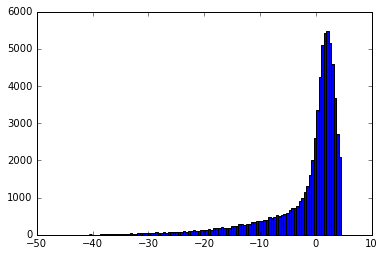

L -6568779.6497
decorr 24.2504056384
L + tau R -6568779.6497
Non zeros elements 71117    fraction 0.32
41


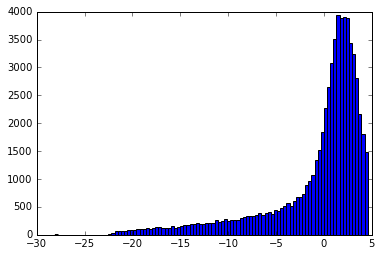

L -6566786.41611
decorr 24.2496745927
L + tau R -6566786.41611
Non zeros elements 68920    fraction 0.31
42


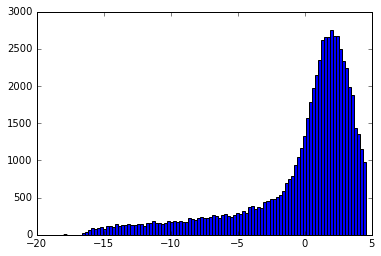

L -6564909.79286
decorr 24.2489442008
L + tau R -6564909.79286
Non zeros elements 66763    fraction 0.3
43


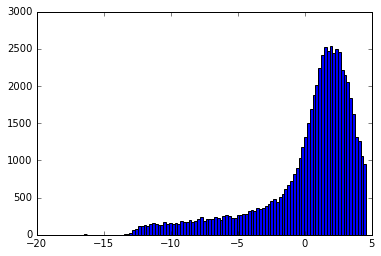

L -6563125.83433
decorr 24.2482507512
L + tau R -6563125.83433
Non zeros elements 64734    fraction 0.29
44


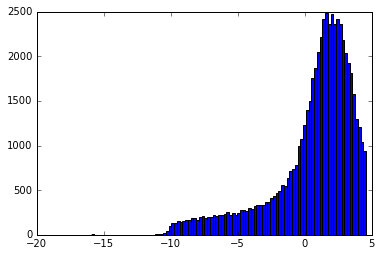

L -6561434.73191
decorr 24.2476289385
L + tau R -6561434.73191
Non zeros elements 62842    fraction 0.28
45


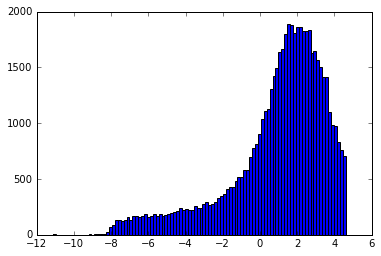

L -6559790.35685
decorr 24.2470319328
L + tau R -6559790.35685
Non zeros elements 61013    fraction 0.27
46


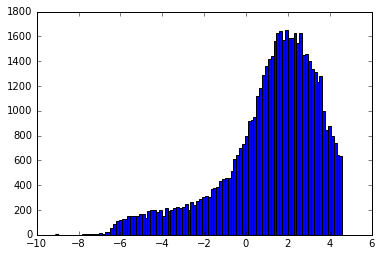

L -6558182.37769
decorr 24.2464616841
L + tau R -6558182.37769
Non zeros elements 59312    fraction 0.27
47


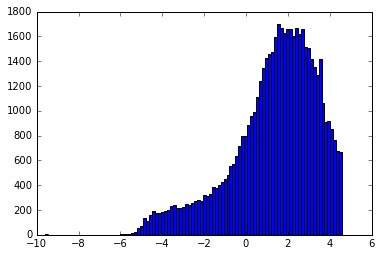

L -6556643.65851
decorr 24.2459050307
L + tau R -6556643.65851
Non zeros elements 57715    fraction 0.26
48


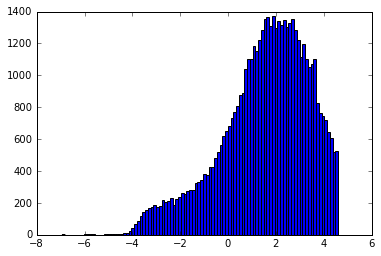

L -6555192.16538
decorr 24.2453338334
L + tau R -6555192.16538
Non zeros elements 56199    fraction 0.25
49


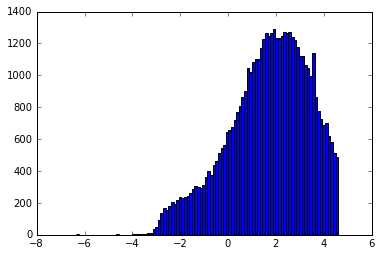

L -6553846.81895
decorr 24.2447693557
L + tau R -6553846.81895
Non zeros elements 54757    fraction 0.25


In [35]:
# design experiment

D, W = origin_freq_matrix.shape
T = 25

np.random.seed(42)

phi_matrix = np.random.uniform(size=(T, W)).astype(np.float64)
phi_matrix /= np.sum(phi_matrix, axis=1)[:, np.newaxis]

theta_matrix = np.random.uniform(size=(D, T)).astype(np.float64)
theta_matrix /= np.sum(theta_matrix, axis=1)[:, np.newaxis]

no_selection_params = {
    'method': perform_e_step_update,
    'block_size': 50,
    'p_dwt_processor': trivial_p_dwt_processor
}
obg_selection_params = {
    'method': perform_obg_e_step_update,
    'block_size': 50,
    'percentile': 97.5
}

regularizations_list = np.zeros(50, dtype=object)
params_list = np.zeros(50, dtype=object)

regularizations_list[:40] = trivial_regularization
regularizations_list[40:] = trivial_regularization
params_list[:40] = no_selection_params
params_list[40:] = obg_selection_params

phi, theta = launch_em(
    freq_matrix=origin_freq_matrix, 
    phi_matrix=phi_matrix,
    theta_matrix=theta_matrix,
    logger=create_decorr_logger(0.),
    regularizations_list=regularizations_list,
    params_list=params_list,
    iters_count=50
)

Начиная с 45ой итерации отображаются распределения логарифмов значений $\Delta L$ при занулении элементов матрицы $\Phi$

In [36]:
evaluate(origin_freq_matrix, phi, theta, dataset)

L				-6553847.0
Average topic correlation	0.0404
Phi nonzeros			54757 	frac	0.246625380025
Theta nonzeros			189167 	frac	0.668789110836
SVM score			0.4669


Матрица $\Phi$ существенно более разрежена чем при PLSA (0.54 не нулей против 0.8) и при разреживающим LDA (0.54 против 0.64). Однако, правдоподобие немного лишь хуже чем при PLSA, а качество SVM даже выше. Разреживание $\Phi$ происходит отчасти за счёт уменьшения разреженности $\Theta$ (такая же как у PLSA).

## OBD для $\Phi$ и $\Theta$

0
L -7577557.14498
decorr 24.8513606695
L + tau R -7577557.14498
Non zeros elements 222025    fraction 1.0
1
L -7544645.12672
decorr 24.8185559002
L + tau R -7544645.12672
Non zeros elements 222025    fraction 1.0
2
L -7490147.65267
decorr 24.7372627276
L + tau R -7490147.65267
Non zeros elements 222025    fraction 1.0
3
L -7409587.12834
decorr 24.5705428905
L + tau R -7409587.12834
Non zeros elements 222025    fraction 1.0
4
L -7314078.58123
decorr 24.3309707495
L + tau R -7314078.58123
Non zeros elements 222025    fraction 1.0
5
L -7220166.49586
decorr 24.1372623993
L + tau R -7220166.49586
Non zeros elements 222025    fraction 1.0
6
L -7139209.80822
decorr 24.098580852
L + tau R -7139209.80822
Non zeros elements 221994    fraction 1.0
7
L -7064706.38328
decorr 24.1187026094
L + tau R -7064706.38328
Non zeros elements 221910    fraction 1.0
8
L -6993093.44012
decorr 24.1580141136
L + tau R -6993093.44012
Non zeros elements 221679    fraction 1.0
9
L -6928340.54047
decorr 24.224251684

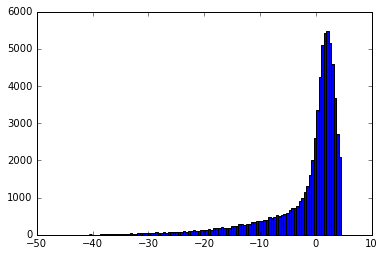

L -6568779.64966
decorr 24.2504056383
L + tau R -6568779.64966
Non zeros elements 69658    fraction 0.31
41


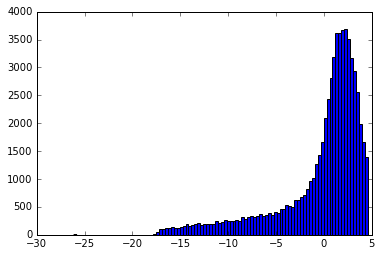

L -6566786.38453
decorr 24.2496745414
L + tau R -6566786.38453
Non zeros elements 66150    fraction 0.3
42


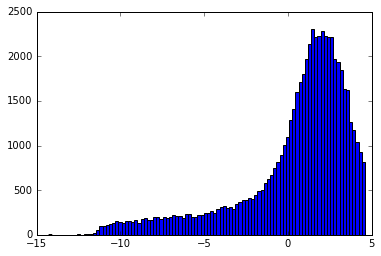

L -6564908.22079
decorr 24.2489412938
L + tau R -6564908.22079
Non zeros elements 62810    fraction 0.28
43


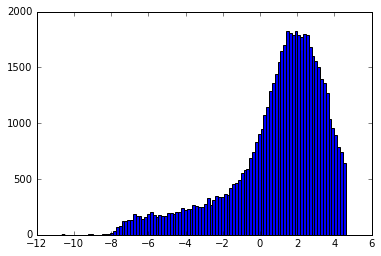

L -6563113.05164
decorr 24.2482228468
L + tau R -6563113.05164
Non zeros elements 59742    fraction 0.27
44


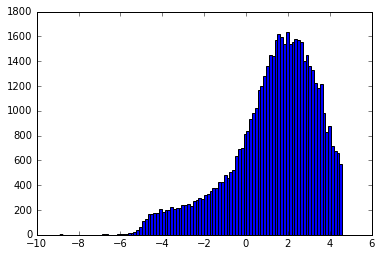

L -6561395.4411
decorr 24.2474867465
L + tau R -6561395.4411
Non zeros elements 56943    fraction 0.26
45


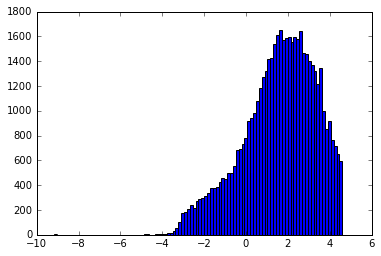

L -6559778.3602
decorr 24.2466484006
L + tau R -6559778.3602
Non zeros elements 54317    fraction 0.24
46


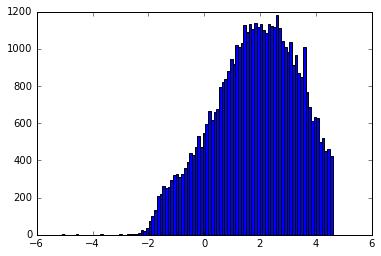

L -6558415.31836
decorr 24.2455355107
L + tau R -6558415.31836
Non zeros elements 51842    fraction 0.23
47


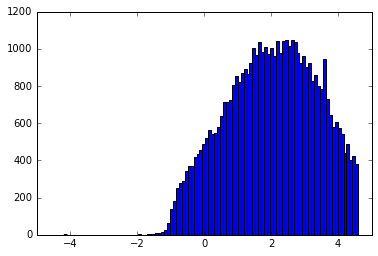

L -6557547.09165
decorr 24.2442213156
L + tau R -6557547.09165
Non zeros elements 49500    fraction 0.22
48


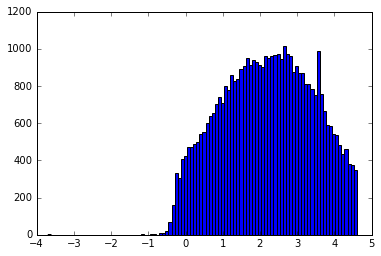

L -6557245.36163
decorr 24.2426792803
L + tau R -6557245.36163
Non zeros elements 47269    fraction 0.21
49


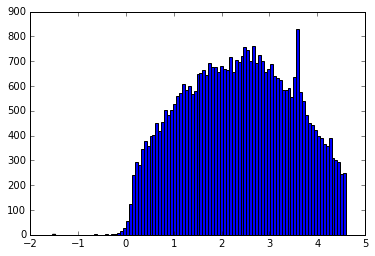

L -6557589.62725
decorr 24.2411846209
L + tau R -6557589.62725
Non zeros elements 45140    fraction 0.2


In [43]:
# design experiment

D, W = origin_freq_matrix.shape
T = 25

np.random.seed(42)

phi_matrix = np.random.uniform(size=(T, W)).astype(np.float64)
phi_matrix /= np.sum(phi_matrix, axis=1)[:, np.newaxis]

theta_matrix = np.random.uniform(size=(D, T)).astype(np.float64)
theta_matrix /= np.sum(theta_matrix, axis=1)[:, np.newaxis]

no_selection_params = {
    'method': perform_e_step_update,
    'block_size': 50,
    'p_dwt_processor': trivial_p_dwt_processor
}
obg_selection_params = {
    'method': perform_obg_e_step_update,
    'block_size': 50,
    'percentile': 95.5,
    'theta_obg': True
}

regularizations_list = np.zeros(50, dtype=object)
params_list = np.zeros(50, dtype=object)

regularizations_list[:40] = trivial_regularization
regularizations_list[40:] = trivial_regularization
params_list[:40] = no_selection_params
params_list[40:] = obg_selection_params

phi, theta = launch_em(
    freq_matrix=origin_freq_matrix, 
    phi_matrix=phi_matrix,
    theta_matrix=theta_matrix,
    logger=create_decorr_logger(0.),
    regularizations_list=regularizations_list,
    params_list=params_list,
    iters_count=50
)

In [44]:
evaluate(origin_freq_matrix, phi, theta, dataset)

L				-6557590.0
Average topic correlation	0.0404
Phi nonzeros			45140 	frac	0.203310438014
Theta nonzeros			124591 	frac	0.440484355666
SVM score			0.4678


При тех же значениях метрик качества, количество нулей в матрице $\Theta$ уменьшилось.

Возможно зануления OBD повторяют зануления lda разреживания. Чтобы проверить это, применим obd к матрицам полученным при помощи lda регуляризатора.

## OBD для $\Phi$ и $\Theta$ поверх регуляризатора разреживания

0
L -7577547.3885
decorr 24.8512951894
L + tau R -7577547.3885
Non zeros elements 221919    fraction 1.0
1
L -7544610.51603
decorr 24.8184738235
L + tau R -7544610.51603
Non zeros elements 221828    fraction 1.0
2
L -7490069.49806
decorr 24.7371319459
L + tau R -7490069.49806
Non zeros elements 221715    fraction 1.0
3
L -7409444.35781
decorr 24.5702850465
L + tau R -7409444.35781
Non zeros elements 221523    fraction 1.0
4
L -7313865.19414
decorr 24.3304800711
L + tau R -7313865.19414
Non zeros elements 221022    fraction 1.0
5
L -7219904.80033
decorr 24.1365578558
L + tau R -7219904.80033
Non zeros elements 219594    fraction 0.99
6
L -7138936.54551
decorr 24.0977609773
L + tau R -7138936.54551
Non zeros elements 214094    fraction 0.96
7
L -7064462.47692
decorr 24.1177246452
L + tau R -7064462.47692
Non zeros elements 203373    fraction 0.92
8
L -6992934.24044
decorr 24.1567988607
L + tau R -6992934.24044
Non zeros elements 194841    fraction 0.88
9
L -6928321.42456
decorr 24.223083

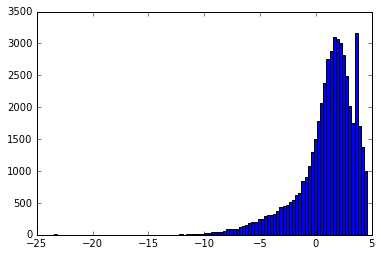

L -6589743.96595
decorr 24.2511713022
L + tau R -6589743.96595
Non zeros elements 57138    fraction 0.26
41


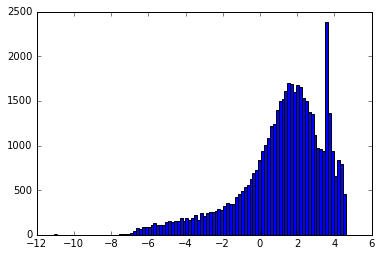

L -6588700.40741
decorr 24.2506071396
L + tau R -6588700.40741
Non zeros elements 56143    fraction 0.25
42


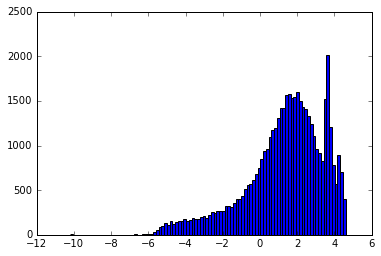

L -6587752.81539
decorr 24.2500552256
L + tau R -6587752.81539
Non zeros elements 55213    fraction 0.25
43


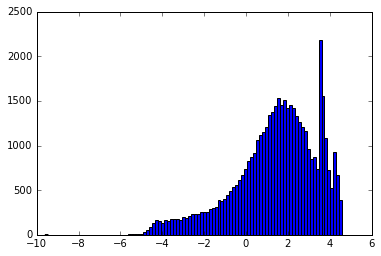

L -6586891.288
decorr 24.2495325261
L + tau R -6586891.288
Non zeros elements 54338    fraction 0.24
44


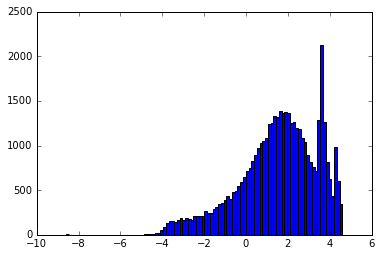

L -6586109.6417
decorr 24.2490252326
L + tau R -6586109.6417
Non zeros elements 53496    fraction 0.24
45


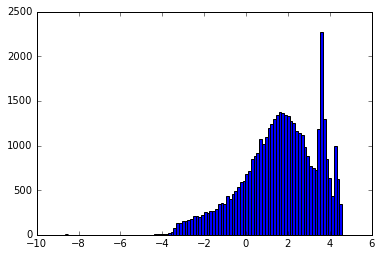

L -6585391.596
decorr 24.2485469942
L + tau R -6585391.596
Non zeros elements 52673    fraction 0.24
46


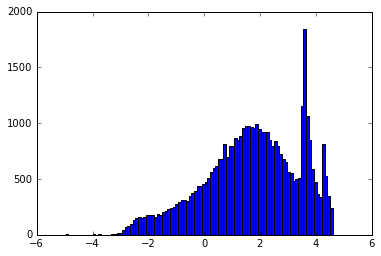

L -6584740.28716
decorr 24.2480849582
L + tau R -6584740.28716
Non zeros elements 51871    fraction 0.23
47


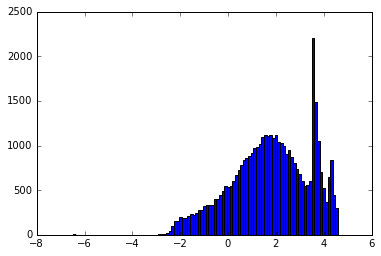

L -6584149.7094
decorr 24.2476029898
L + tau R -6584149.7094
Non zeros elements 51089    fraction 0.23
48


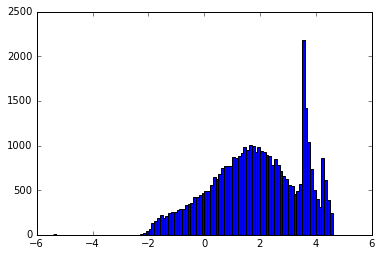

L -6583629.89651
decorr 24.2471389707
L + tau R -6583629.89651
Non zeros elements 50322    fraction 0.23
49


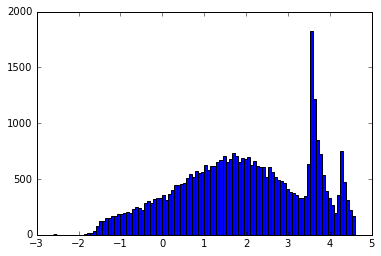

L -6583167.71516
decorr 24.2466267673
L + tau R -6583167.71516
Non zeros elements 49566    fraction 0.22


In [39]:
# design experiment

D, W = origin_freq_matrix.shape
T = 25

np.random.seed(42)

phi_matrix = np.random.uniform(size=(T, W)).astype(np.float64)
phi_matrix /= np.sum(phi_matrix, axis=1)[:, np.newaxis]

theta_matrix = np.random.uniform(size=(D, T)).astype(np.float64)
theta_matrix /= np.sum(theta_matrix, axis=1)[:, np.newaxis]

no_selection_params = {
    'method': perform_e_step_update,
    'block_size': 50,
    'p_dwt_processor': trivial_p_dwt_processor
}
obg_selection_params = {
    'method': perform_obg_e_step_update,
    'block_size': 50,
    'percentile': 98.5,
    'theta_obg': True
}

regularizations_list = np.zeros(50, dtype=object)
params_list = np.zeros(50, dtype=object)

regularizations_list[:40] = create_reg_lda(-0.001, -0.001)
regularizations_list[40:] = trivial_regularization
params_list[:40] = no_selection_params
params_list[40:] = obg_selection_params

phi, theta = launch_em(
    freq_matrix=origin_freq_matrix, 
    phi_matrix=phi_matrix,
    theta_matrix=theta_matrix,
    logger=create_decorr_logger(0.),
    regularizations_list=regularizations_list,
    params_list=params_list,
    iters_count=50
)

In [40]:
evaluate(origin_freq_matrix, phi, theta, dataset)

L				-6583168.0
Average topic correlation	0.0404
Phi nonzeros			49566 	frac	0.223245130053
Theta nonzeros			69665 	frac	0.246296623652
SVM score			0.4406


При тех же значениях метрик получаем более разреженную модель.

## Ещё одно альтернативное решение: разреживать $p_{tdw}$ на Е шаге, чтобы каждое вхождение слова в документ описывалось небольшим числом тем.

In [41]:
# design experiment

D, W = origin_freq_matrix.shape
T = 25

np.random.seed(42)

phi_matrix = np.random.uniform(size=(T, W)).astype(np.float64)
phi_matrix /= np.sum(phi_matrix, axis=1)[:, np.newaxis]

theta_matrix = np.random.uniform(size=(D, T)).astype(np.float64)
theta_matrix /= np.sum(theta_matrix, axis=1)[:, np.newaxis]

big_selection_params = {
    'method': perform_e_step_update,
    'block_size': 50,
    'p_dwt_processor': create_frac_of_max_p_dwt_processor(0.5)
}
no_selection_params = {
    'method': perform_e_step_update,
    'block_size': 50,
    'p_dwt_processor': trivial_p_dwt_processor
}

regularizations_list = np.zeros(50, dtype=object)
params_list = np.zeros(50, dtype=object)

regularizations_list[:] = trivial_regularization
params_list[:40] = no_selection_params
params_list[40:47] = big_selection_params
params_list[47:50] = no_selection_params

phi, theta = launch_em(
    freq_matrix=origin_freq_matrix, 
    phi_matrix=phi_matrix,
    theta_matrix=theta_matrix,
    logger=create_decorr_logger(0.),
    regularizations_list=regularizations_list,
    params_list=params_list,
    iters_count=50
)

0
L -7577557.14498
decorr 24.8513606695
L + tau R -7577557.14498
Non zeros elements 222025    fraction 1.0
1
L -7544645.12672
decorr 24.8185559002
L + tau R -7544645.12672
Non zeros elements 222025    fraction 1.0
2
L -7490147.65267
decorr 24.7372627276
L + tau R -7490147.65267
Non zeros elements 222025    fraction 1.0
3
L -7409587.12834
decorr 24.5705428905
L + tau R -7409587.12834
Non zeros elements 222025    fraction 1.0
4
L -7314078.58123
decorr 24.3309707495
L + tau R -7314078.58123
Non zeros elements 222025    fraction 1.0
5
L -7220166.49586
decorr 24.1372623993
L + tau R -7220166.49586
Non zeros elements 222025    fraction 1.0
6
L -7139209.80822
decorr 24.098580852
L + tau R -7139209.80822
Non zeros elements 221994    fraction 1.0
7
L -7064706.38328
decorr 24.1187026094
L + tau R -7064706.38328
Non zeros elements 221910    fraction 1.0
8
L -6993093.44012
decorr 24.1580141136
L + tau R -6993093.44012
Non zeros elements 221679    fraction 1.0
9
L -6928340.54047
decorr 24.224251684

In [42]:
evaluate(origin_freq_matrix, phi, theta, dataset)

L				-6570248.0
Average topic correlation	0.0404
Phi nonzeros			50187 	frac	0.226042112375
Theta nonzeros			49071 	frac	0.173487714336
SVM score			0.4492


Получается очень хорошее разреживание $\Theta$, неплохое разреживание $\Phi$. Однако SVM качество падает.